In [1]:
# importing all necessery modules 

import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import RegexpTokenizer
from nltk import word_tokenize, sent_tokenize
import string
import spacy
from string import punctuation
import emoji
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer
from sklearn.cluster import KMeans
from sklearn.feature_extraction import text 
from sklearn.externals import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import normalize;
## ENTITY EXTRACTION
from spacy.lang.en import English
from spacy import displacy
from collections import Counter


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/adwoabrako/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/adwoabrako/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/Users/adwoabrako/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
data_vac = pd.read_csv('/Users/adwoabrako/The George Washington University/Menon, Rashmi - Capstone/Data/Jan1st2019-Oct 15th 2020Overperforming.csv')
print("shape of entire data", data_vac.shape)

shape of entire data (91037, 30)


/Users/adwoabrako/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
## Drop duplicates [if any]

data_vac1 = data_vac.Message.drop_duplicates(keep="first")
print("shape of entire data", data_vac1.shape)

shape of entire data (60494,)


In [4]:
data_vac.columns

Index(['Page Name', 'User Name', 'Facebook Id', 'Likes at Posting', 'Created',
       'Type', 'Likes', 'Comments', 'Shares', 'Love', 'Wow', 'Haha', 'Sad',
       'Angry', 'Care', 'Video Share Status', 'Post Views', 'Total Views',
       'Total Views For All Crossposts', 'Video Length', 'URL', 'Message',
       'Link', 'Final Link', 'Image Text', 'Link Text', 'Description',
       'Sponsor Id', 'Sponsor Name', 'Overperforming Score'],
      dtype='object')

In [5]:
## Drop irrelevant columns

data_vac1 = data_vac.drop(columns=['Type','Video Length','Love', 'Wow', 'Haha', 'Sad',
       'Angry', 'Care', 'Video Share Status', 'URL','Link', 'Final Link', 'Image Text', 'Link Text', 'Sponsor Id', 'Sponsor Name'])

data_vac1.columns

Index(['Page Name', 'User Name', 'Facebook Id', 'Likes at Posting', 'Created',
       'Likes', 'Comments', 'Shares', 'Post Views', 'Total Views',
       'Total Views For All Crossposts', 'Message', 'Description',
       'Overperforming Score'],
      dtype='object')

In [6]:
data_vac1.Message.count

<bound method Series.count of 0        So the Major of Newcastle thinks she can ban a...
1        Well, today LNP showed their cards the party d...
2                                                      NaN
3        Proof of causality for COVID19 has not been pr...
4                                                      NaN
                               ...                        
91032                                                  NaN
91033    Shattered dreams in the wake of Gardasil. Anot...
91034                                                  NaN
91035    The Standard of Care for pets, shouldn’t you a...
91036    From Kevin Barry: “‘Our product doesn't work w...
Name: Message, Length: 91037, dtype: object>

In [7]:
vac_next = pd.DataFrame(data_vac1)
vac_next

,Page Name,User Name,Facebook Id,Likes at Posting,Created,Likes,Comments,Shares,Post Views,Total Views,Total Views For All Crossposts,Message,Description,Overperforming Score
0,No Jab No Pay No Way - Freedom of Choice,nojabnopaynoway,8.606510e+14,13635.0,2020-10-15 07:26:50 EDT,0,0,1,0,0,0,So the Major of Newcastle thinks she can ban a...,NaN,-0.82
1,No Jab No Pay No Way - Freedom of Choice,nojabnopaynoway,8.606510e+14,13635.0,2020-10-15 07:25:55 EDT,2,0,1,0,0,0,"Well, today LNP showed their cards the party d...",NaN,-0.73
2,International Revolution For Choice,internationalrevolutionforchoice,1.229020e+14,6430.0,2020-10-15 06:36:23 EDT,0,0,0,0,0,0,NaN,The Great Barrington Declaration – As infectio...,-32.00
3,Vaccination Decisions,vaccinationdecisions,5.307020e+14,5057.0,2020-10-15 04:30:30 EDT,26,3,15,0,0,0,Proof of causality for COVID19 has not been pr...,NaN,2.79
4,VAXXED-Northwest FL,bringvaxxedtonwfl,1.238080e+15,420.0,2020-10-15 04:28:22 EDT,1,0,0,0,0,0,NaN,I want to invite you to this year’s most infor...,-0.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91032,VaXism,VaXismNEWS,6.690840e+14,86130.0,2019-01-01 03:05:54 EST,1,0,0,219,1409,0,NaN,"🎉This year has been INCREDIBLE! The growth, th...",-30.50
91033,Australian Vaccination-risks Network Inc. - AVN,avn.org.au,1.594560e+15,NaN,2019-01-01 02:07:59 EST,42,10,106,0,0,0,Shattered dreams in the wake of Gardasil. Anot...,My son's new medical conditions after Gardasil...,2.93
91034,Kansans Against Forced Vaccination,NaN,8.886640e+14,NaN,2019-01-01 01:49:21 EST,0,0,0,0,0,0,NaN,To the World Health Organisation and those att...,-18.00
91035,Informed Choice Washington,InformedChoiceWashington,1.078830e+14,NaN,2019-01-01 01:42:11 EST,42,8,33,0,0,0,"The Standard of Care for pets, shouldn’t you a...",NaN,-1.88


In [8]:
## Convert column to DateTime


vac_next['Created'] = pd.to_datetime(vac_next['Created'])

In [9]:
## Drop NAs based on Message column

vac_next = vac_next.dropna(subset = ['Message'])

In [10]:
vac_next["Message"].tail(50)

90961    Too many Parents have been deceived as Satan d...
90962    This little on-line course is WONDERFUL ... it...
90963    Entire post is open to the public! Should we b...
90964    We all remember that terrible chickenpox outbr...
90965    CDC discusses contraindications to vaccines. T...
90966    A confidential GlaxoSmithKline document recent...
90970    After outbreaks of measles throughout Rwanda's...
90971    Vaccine's Safety: A Crime Against Humanity Mor...
90972    Common Sense Vaccine Questions To Ask Your Doc...
90973    Common Sense Vaccine Questions To Ask Your Doc...
90974    Don't let your child's body be a pincushion of...
90975    FROM THE ARTICLE:"I have been around long enou...
90976    FROM THE ARTICLE:"I have been around long enou...
90977    Georgia has medical and religious exemptions t...
90978    Are Objections to Chickenpox Vaccine "Junk Sci...
90979     This brings a tear to my lizard eye... (Fan sub)
90982    HAPPY NEW YEAR EVERYONE! I hope you had a marv.

In [11]:
stop_words = stopwords.words('english')  

def preprocess(raw_text):
    
    #regular expression keeping only letters 
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)

    # convert to lower case and split into words 
    words = letters_only_text.lower().split()

    cleaned_words = []
    lemmatizer = PorterStemmer() 
    
    # remove stopwords
    for word in words:
        if word not in stop_words:
            cleaned_words.append(word)
    
    # stemming words
    stemmed_words = []
    for word in cleaned_words:
        word = lemmatizer.stem(word)
        stemmed_words.append(word)
    
    # converting list back to string
    return " ".join(stemmed_words)

In [12]:
vac_next['clean'] = vac_next['Message'].apply(preprocess)

/Users/adwoabrako/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
vac_next['clean'].tail(60)

90943    levi back thought new shot approv want get spe...
90945                           http www facebook com post
90949                                                 like
90950    help echo chamber pleas let feel good decis te...
90951    melissa consid distinct honor abl spend coupl ...
90953    vaccin autism new info vaccin autism world ren...
90954    vaccin autism new info vaccin autism world ren...
90957    militari experiment vaccin kill million peopl ...
90958    stat one alway mind nb monitor site show repor...
90960    vaccin autism new info vaccin autism world ren...
90961    mani parent deceiv satan disguis angel light g...
90962    littl line cours wonder free easi well done re...
90963    entir post open public scare hexaval vaccin ht...
90964    rememb terribl chickenpox outbreak http www th...
90965    cdc discuss contraind vaccin list reason vacci...
90966    confidenti glaxosmithklin document recent leak...
90970    outbreak measl throughout rwanda prison govern.

## Visuals

In [14]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


# Helper function
def plot_15_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:15]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title="15 most common words")
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
    
    
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words= frozenset(["http", "com","www"]))


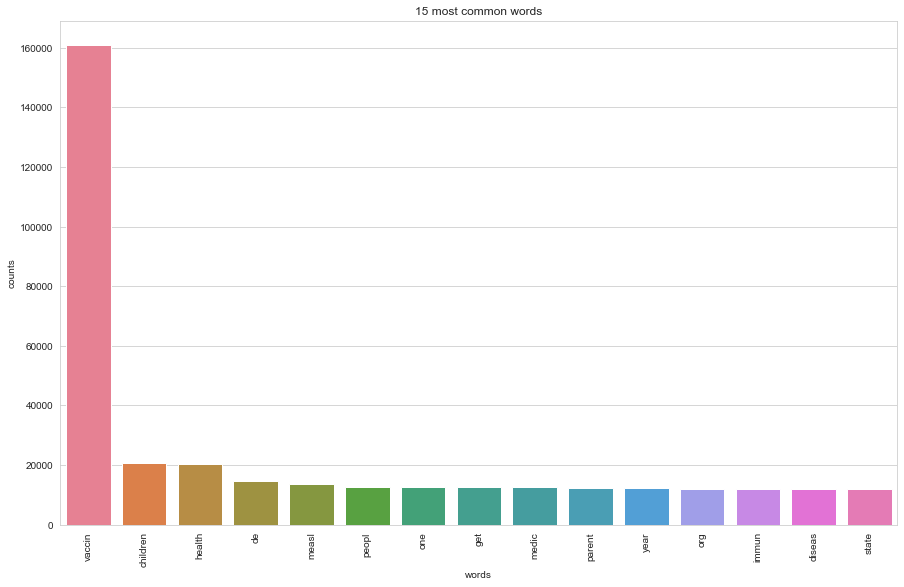

In [15]:
# Fit and transform the processed titles
count_data_active = count_vectorizer.fit_transform(vac_next['clean'].astype(str))

# Visualise the 10 most common words
plot_15_most_common_words(count_data_active, count_vectorizer)

## Word Cloud

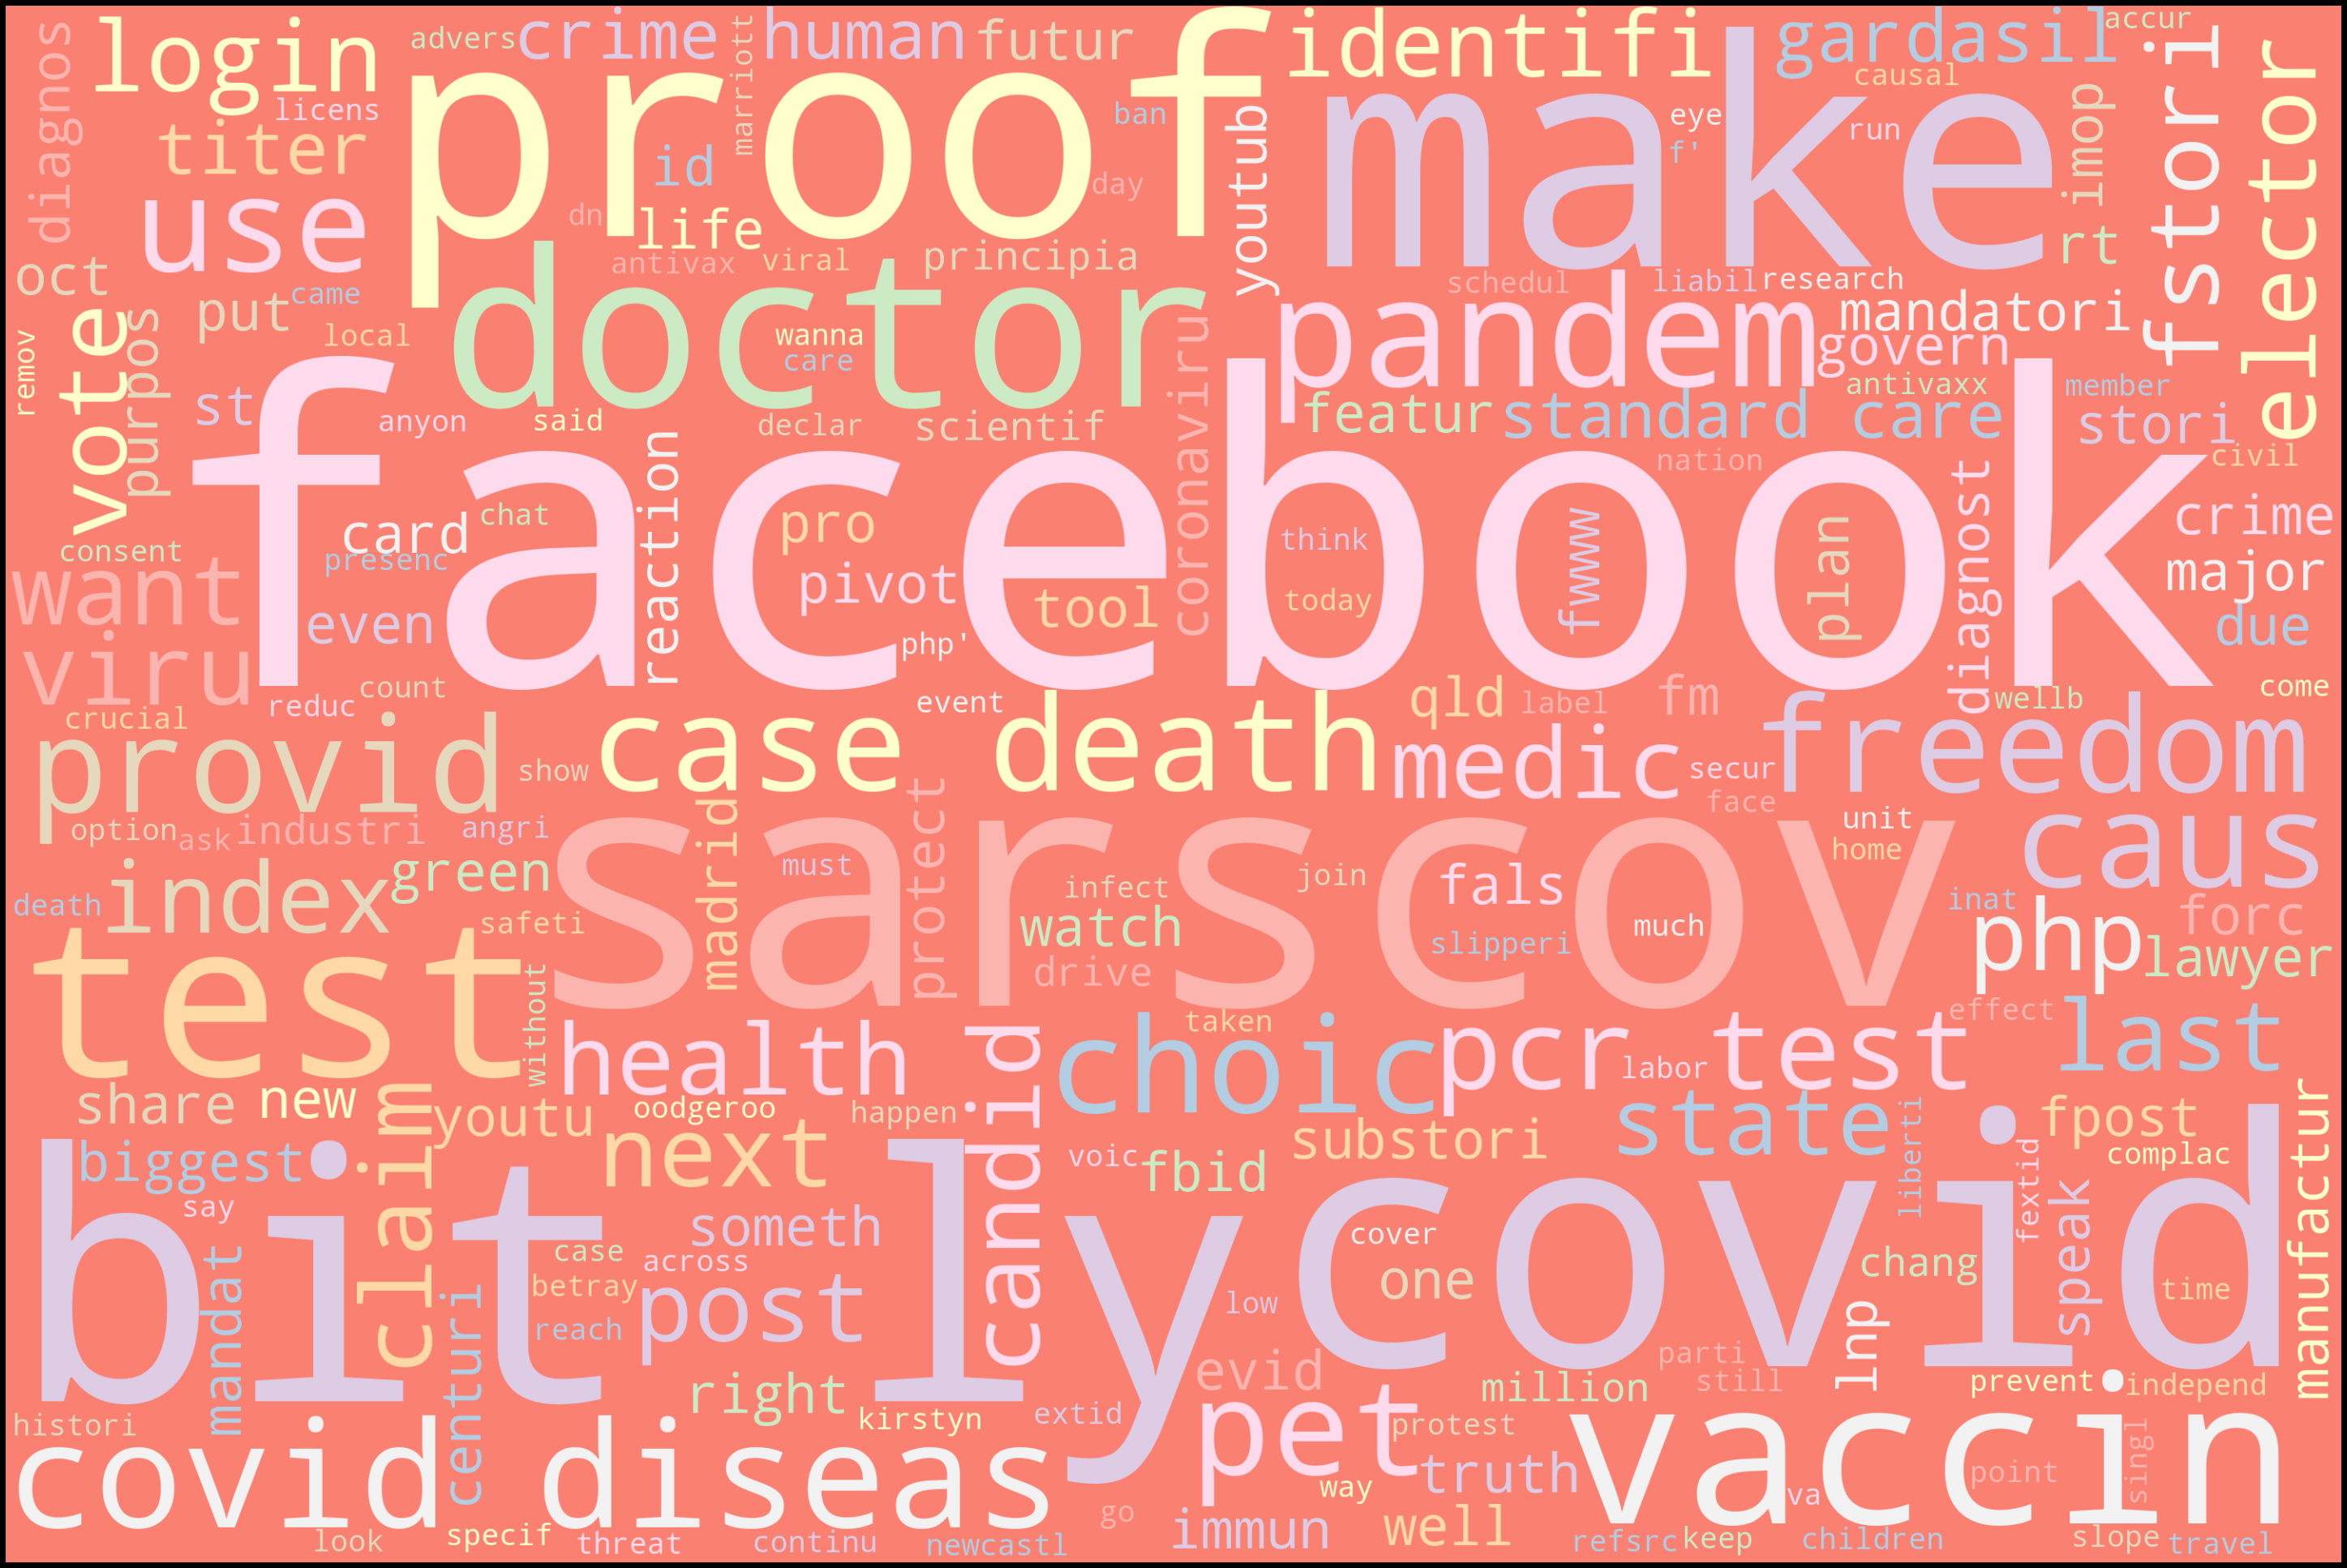

In [16]:
text1 = vac_next.clean.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'salmon',
    colormap='Pastel1',
    stopwords = STOPWORDS).generate(str(text1))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## TF-IDF

In [17]:
cvec = CountVectorizer(stop_words= frozenset(["http", "com","www", 'fwww']), min_df=1, max_df=.5, ngram_range=(1,2))

In [18]:
tf_vec = TfidfVectorizer(stop_words= frozenset(["http", "com","www", 'fwww']), min_df=1, max_df=.5, ngram_range=(1,2))

In [19]:

x_k = tf_vec.fit_transform(vac_next['clean']).toarray()

## N-GRAMS

In [20]:
# Calculate all the n-grams found in all documents

from itertools import islice
cvec.fit(vac_next.clean)
listVac = list(islice(cvec.vocabulary_.items(), 70))

In [21]:
listVac

[('major', 644246),
 ('newcastl', 725339),
 ('think', 1089251),
 ('ban', 92451),
 ('antivaxx', 53510),
 ('event', 354648),
 ('want', 1191598),
 ('run', 948140),
 ('anyon', 54119),
 ('wanna', 1191574),
 ('join', 565411),
 ('antivax', 53342),
 ('protest', 865939),
 ('someth', 1016434),
 ('post', 835769),
 ('facebook', 373649),
 ('extid', 371321),
 ('login', 627097),
 ('next', 728001),
 ('fpost', 413956),
 ('fextid', 391380),
 ('dn', 297665),
 ('share', 990289),
 ('stori', 1042127),
 ('php', 814230),
 ('fbid', 385159),
 ('substori', 1051988),
 ('index', 522414),
 ('id', 502480),
 ('fm', 403887),
 ('fstori', 420251),
 ('refsrc', 907225),
 ('major newcastl', 644562),
 ('newcastl think', 725344),
 ('think ban', 1089326),
 ('ban antivaxx', 92469),
 ('antivaxx event', 53547),
 ('event want', 355631),
 ('want run', 1192378),
 ('run anyon', 948164),
 ('anyon wanna', 54627),
 ('wanna join', 1191582),
 ('join antivax', 565427),
 ('antivax protest', 53445),
 ('protest someth', 866291),
 ('someth po

In [24]:
# Check how many total n-grams we have
len(cvec.vocabulary_)

1246813

In [22]:
cvec_counts = cvec.transform(vac_next.clean)
print ('sparse matrix shape:', cvec_counts.shape)
print ('nonzero count:', cvec_counts.nnz)
print ('sparsity: %.2f%%' % (100.0 * cvec_counts.nnz / (cvec_counts.shape[0] * cvec_counts.shape[1])))

sparse matrix shape: (66595, 1246813)
nonzero count: 5837361
sparsity: 0.01%


In [23]:
occ = np.asarray(cvec_counts.sum(axis=0)).ravel().tolist()
counts_df = pd.DataFrame({'term': cvec.get_feature_names(), 'occurrences': occ})
counts_df.sort_values(by='occurrences', ascending=False).head(10)

,term,occurrences
169425,children,20811
469972,health,20293
253919,de,14790
664081,measl,13700
800859,peopl,12637
758249,one,12606
433128,get,12514
667816,medic,12496
785889,parent,12278
1232320,year,12182


## TF-IDF

In [24]:
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(cvec_counts)

In [25]:
## Average weights 

weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})
weights_df.sort_values(by='weight', ascending=False).head(10)

,term,weight
169425,children,0.008751
469972,health,0.008331
767520,org,0.007873
664081,measl,0.007704
433128,get,0.006646
785889,parent,0.006503
402319,flu,0.006075
800859,peopl,0.005804
510482,immun,0.005766
725579,news,0.005701


In [27]:
#define vectorizer parameters
tfidf__vectorizer = TfidfVectorizer(max_df=0.8, max_features=2000,
                                 min_df=0.2, stop_words= frozenset(["http", "youtub", "youtu", "com","www", 'fwww', 'http www']),
                                 use_idf=True, ngram_range=(1,3)) 

tfidf_matrix = tfidf__vectorizer.fit_transform(vac_next.clean) #fit the vectorizer to data

## NMF MODEL [Whole Dataset]

In [28]:
vectorizer1 = TfidfVectorizer(analyzer='word', max_features=3000, stop_words= frozenset(["http","mo","let", "youtub", "youtu","ok", "oh", "wow", 
                                                                                         "fd", "fv", "id","ow", "ly", 'year', 'ii', 'mmr','donald', 'dr', 'sfn',
                                                                                         "com","www", 'fwww', 'http www', 'dyoutu', 'mgfi']))
x_counts = vectorizer1.fit_transform(vac_next.clean)

In [29]:
transformer1 = TfidfTransformer(smooth_idf=False)
x_tfidf = transformer1.fit_transform(x_counts)

In [30]:
from sklearn.preprocessing import normalize;

num_topics = 10

xtfidf_norm = normalize(x_tfidf, norm='l1', axis=1)

In [31]:
#obtain a NMF model.
modelnmf = NMF(n_components=num_topics, init='nndsvd');
#fit the model
modelnmf.fit_transform(xtfidf_norm)

array([[0.00000000e+00, 8.11650686e-05, 3.38913686e-02, ...,
        0.00000000e+00, 8.95788206e-05, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 4.54296220e-03, ...,
        0.00000000e+00, 8.16542696e-05, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 2.69468597e-05, 4.34586666e-04],
       ...,
       [0.00000000e+00, 1.34576558e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.38762924e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.80519218e-04, 5.86214402e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 7.91917902e-04]])

In [32]:
def get_nmf_topics(model, n_top_words):
    
    #the word ids obtained need to be reverse-mapped to the words so we can print the topic names.
    feat_names = vectorizer1.get_feature_names()
    
    word_dict = {};
    for i in range(num_topics):
        
        #for each topic, obtain the largest values, and add the words they map to into the dictionary.
        words_ids = model.components_[i].argsort()[:-20 - 1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words;
    
    return pd.DataFrame(word_dict);

In [33]:
get_nmf_topics(modelnmf, 50)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10
0,michiganvaccinechoic,vaxxeddownund,facebook,watch,hpv,fan,thank,good,know,vaccin
1,michiganforvaccinechoic,injuri,post,featur,flu,sub,ted,news,fact,injuri
2,org,unvaccin,video,app,measl,submiss,share,read,doctor,mandat
3,theater,healthi,fbid,egq,vax,found,jim,question,need,covid
4,live,stori,php,share,get,anti,speak,share,want,death
5,video,dtap,stori,sorri,news,sad,paul,greater,better,refut
6,type,flu,highwiretalk,index,truth,vax,god,idea,dad,mandatori
7,photo,gardasil,event,video,covid,sure,shingl,remind,read,meme
8,thevaccinereact,investig,photo,googl,say,sent,via,fight,realli,free
9,facebook,troll,revolutionforchoic,must,parent,vaxer,robert,keep,understand,safe


## NMF 2019 Data

In [34]:
import datetime as dt
from dateutil import parser

In [35]:
## Strip time from date


vac_next['Created'] = pd.to_datetime(vac_next['Created']).dt.date
vac_next

/Users/adwoabrako/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Page Name,User Name,Facebook Id,Likes at Posting,Created,Likes,Comments,Shares,Post Views,Total Views,Total Views For All Crossposts,Message,Description,Overperforming Score,clean
0,No Jab No Pay No Way - Freedom of Choice,nojabnopaynoway,8.606510e+14,13635.0,2020-10-15,0,0,1,0,0,0,So the Major of Newcastle thinks she can ban a...,NaN,-0.82,major newcastl think ban antivaxx event want r...
1,No Jab No Pay No Way - Freedom of Choice,nojabnopaynoway,8.606510e+14,13635.0,2020-10-15,2,0,1,0,0,0,"Well, today LNP showed their cards the party d...",NaN,-0.73,well today lnp show card parti declar put imop...
3,Vaccination Decisions,vaccinationdecisions,5.307020e+14,5057.0,2020-10-15,26,3,15,0,0,0,Proof of causality for COVID19 has not been pr...,NaN,2.79,proof causal covid provid crime human could ev...
5,Californians for Vaccine Choice,CaliforniansAgainstSB277,1.374880e+15,23303.0,2020-10-15,2,0,0,0,0,0,Get your tickets today! The online Conference ...,This will be an historic conference during a y...,-9.33,get ticket today onlin confer start friday oct th
7,Erin at Health Nut News,HealthNutNews,1.393370e+14,545457.0,2020-10-15,423,917,211,0,0,0,FB is admittedly censoring our reach to just a...,The Microsoft co-founder worries that anti-vax...,4.96,fb admittedli censor reach fraction peopl foll...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91028,National Vaccine Information Center,national.vaccine.information.center,1.437450e+11,210071.0,2019-01-01,234,41,466,0,0,0,Scientists Conclude Pertussis Vaccine Causes P...,"According to scientists, the pertussis vaccine...",8.86,scientist conclud pertussi vaccin caus perman ...
91029,Stop Mandatory Vaccination,StopMandatoryVaccinationNow,6.140730e+14,123112.0,2019-01-01,28,0,36,0,0,0,"""It’s constantly thinking ten steps ahead of e...","It is a 24/7 365 day-a-year financially, emoti...",1.19,constantli think ten step ahead everi situat t...
91033,Australian Vaccination-risks Network Inc. - AVN,avn.org.au,1.594560e+15,NaN,2019-01-01,42,10,106,0,0,0,Shattered dreams in the wake of Gardasil. Anot...,My son's new medical conditions after Gardasil...,2.93,shatter dream wake gardasil anoth life sever d...
91035,Informed Choice Washington,InformedChoiceWashington,1.078830e+14,NaN,2019-01-01,42,8,33,0,0,0,"The Standard of Care for pets, shouldn’t you a...",NaN,-1.88,standard care pet love one receiv standard car...


In [36]:
split_date_one = dt.date(2019,12,31)

df_date2019 = vac_next.loc[vac_next['Created'] <= split_date_one]



In [37]:
df_date2019

,Page Name,User Name,Facebook Id,Likes at Posting,Created,Likes,Comments,Shares,Post Views,Total Views,Total Views For All Crossposts,Message,Description,Overperforming Score,clean
30010,Australian Vaccination-risks Network Inc. - AVN,avn.org.au,1.594560e+15,11807.0,2019-12-31,13,55,36,0,0,0,Another vaccine being developed. https://mobil...,A dementia vaccine — which is the brainchild o...,2.06,anoth vaccin develop http mobil abc net au new...
30011,KNOW Vaccines,NaN,1.491330e+14,913.0,2019-12-31,1,0,0,0,0,0,Thank you NVIC!!!,"Happy New Year from NVIC! Our ""No Forced Vacc...",-21.00,thank nvic
30012,A Voice for Choice,avoiceforchoice,8.537880e+14,15436.0,2019-12-31,3,0,0,0,0,0,If you appreciate the work A Voice for Choice ...,NaN,-17.33,appreci work voic choic advocaci pleas support...
30013,Стоп на задължителната ваксинация,zapravonaizbor,3.197300e+14,3075.0,2019-12-31,3,0,0,0,0,0,Информационен бюлетин на EFVV № 1 Европейският...,EFVV newsletter n°1\n\nThe European Forum for ...,-18.33,efvv http efvv eu file newslett januari pdf ef...
30014,WeAreChange Western Australia,WeAreChangeWA,1.423030e+14,672.0,2019-12-31,3,0,0,0,0,0,2014 article,A controversial government-backed cervical can...,-0.81,articl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91028,National Vaccine Information Center,national.vaccine.information.center,1.437450e+11,210071.0,2019-01-01,234,41,466,0,0,0,Scientists Conclude Pertussis Vaccine Causes P...,"According to scientists, the pertussis vaccine...",8.86,scientist conclud pertussi vaccin caus perman ...
91029,Stop Mandatory Vaccination,StopMandatoryVaccinationNow,6.140730e+14,123112.0,2019-01-01,28,0,36,0,0,0,"""It’s constantly thinking ten steps ahead of e...","It is a 24/7 365 day-a-year financially, emoti...",1.19,constantli think ten step ahead everi situat t...
91033,Australian Vaccination-risks Network Inc. - AVN,avn.org.au,1.594560e+15,NaN,2019-01-01,42,10,106,0,0,0,Shattered dreams in the wake of Gardasil. Anot...,My son's new medical conditions after Gardasil...,2.93,shatter dream wake gardasil anoth life sever d...
91035,Informed Choice Washington,InformedChoiceWashington,1.078830e+14,NaN,2019-01-01,42,8,33,0,0,0,"The Standard of Care for pets, shouldn’t you a...",NaN,-1.88,standard care pet love one receiv standard car...


## NMF MODEL [2019]

In [38]:
x_counts2019 = vectorizer1.fit_transform(df_date2019.clean)

In [39]:
x_tfidf2019 = transformer1.fit_transform(x_counts2019)
xtfidf2019_norm = normalize(x_tfidf2019, norm='l1', axis=1)

In [40]:
#obtain a NMF model.
modelnmf2019 = NMF(n_components=num_topics, init='nndsvd');
#fit the model
modelnmf2019.fit(xtfidf2019_norm)

NMF(alpha=0.0, beta_loss='frobenius', init='nndsvd', l1_ratio=0.0, max_iter=200,
    n_components=10, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [41]:
get_nmf_topics(modelnmf2019, 50)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10
0,michiganvaccinechoic,facebook,watch,fan,vaccin,thank,good,vax,know,meme
1,michiganforvaccinechoic,post,featur,sub,measl,jim,news,cdcwhistleblow,truth,refut
2,org,video,desktop,submiss,hpv,share,question,childrenshealthdefens,fact,anti
3,theater,fbid,app,found,flu,speak,read,anti,doctor,via
4,video,php,share,sure,mandat,via,share,truth,need,vaxxer
5,type,stori,video,sad,news,paul,greater,pro,want,vaxer
6,live,revolutionforchoic,fbclid,anti,get,god,fight,video,better,vaccin
7,photo,photo,iwar,think,informedcons,doctor,video,injuri,read,pro
8,thevaccinereact,theater,pleas,sound,injuri,robert,idea,news,realli,vax
9,facebook,group,must,comment,parent,ben,pleas,org,scienc,station


## NMF 2020 Data

In [42]:
df_date2020 = vac_next.loc[vac_next['Created'] > split_date_one]
df_date2020

,Page Name,User Name,Facebook Id,Likes at Posting,Created,Likes,Comments,Shares,Post Views,Total Views,Total Views For All Crossposts,Message,Description,Overperforming Score,clean
0,No Jab No Pay No Way - Freedom of Choice,nojabnopaynoway,8.606510e+14,13635.0,2020-10-15,0,0,1,0,0,0,So the Major of Newcastle thinks she can ban a...,NaN,-0.82,major newcastl think ban antivaxx event want r...
1,No Jab No Pay No Way - Freedom of Choice,nojabnopaynoway,8.606510e+14,13635.0,2020-10-15,2,0,1,0,0,0,"Well, today LNP showed their cards the party d...",NaN,-0.73,well today lnp show card parti declar put imop...
3,Vaccination Decisions,vaccinationdecisions,5.307020e+14,5057.0,2020-10-15,26,3,15,0,0,0,Proof of causality for COVID19 has not been pr...,NaN,2.79,proof causal covid provid crime human could ev...
5,Californians for Vaccine Choice,CaliforniansAgainstSB277,1.374880e+15,23303.0,2020-10-15,2,0,0,0,0,0,Get your tickets today! The online Conference ...,This will be an historic conference during a y...,-9.33,get ticket today onlin confer start friday oct th
7,Erin at Health Nut News,HealthNutNews,1.393370e+14,545457.0,2020-10-15,423,917,211,0,0,0,FB is admittedly censoring our reach to just a...,The Microsoft co-founder worries that anti-vax...,4.96,fb admittedli censor reach fraction peopl foll...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30000,No Jab No Pay No Way - Freedom of Choice,nojabnopaynoway,8.606510e+14,11165.0,2020-01-01,1,0,1,0,0,0,FANTASTIC work happening in Southern Californi...,TWO NEW SOUTHERN CALIFORNIA V is for VACCINE E...,-25.00,fantast work happen southern california two ne...
30002,No Jab No Pay No Way - Freedom of Choice,nojabnopaynoway,8.606510e+14,11165.0,2020-01-01,118,10,49,0,0,0,After years of battling to preserve the right ...,NaN,1.82,year battl preserv right inform consent regard...
30003,No Jab No Pay No Way - Freedom of Choice,nojabnopaynoway,8.606510e+14,11165.0,2020-01-01,21,0,5,0,0,0,PLEASE FOLLOW ICAN IN 2020! In 2019 ICAN... ✅ ...,In 2019 ICAN:\n✅ Won a lawsuit against the FDA...,-1.85,pleas follow ican ican lawsuit fda forc admit ...
30005,No Jab No Pay No Way - Freedom of Choice,nojabnopaynoway,8.606510e+14,11165.0,2020-01-01,52,18,32,0,0,0,UNBELIEVABLE!! Dear Oprah: Please sit down and...,NaN,2.76,unbeliev dear oprah pleas sit take pfizer new ...


In [43]:
## NMF - 2020

x_counts2020 = vectorizer1.fit_transform(df_date2020.clean)
x_tfidf2020 = transformer1.fit_transform(x_counts2020)
xtfidf2020_norm = normalize(x_tfidf2020, norm='l1', axis=1)

In [44]:
#obtain a NMF model.
modelnmf2020 = NMF(n_components=num_topics, init='nndsvd');
#fit the model
modelnmf2020.fit(xtfidf2020_norm)

NMF(alpha=0.0, beta_loss='frobenius', init='nndsvd', l1_ratio=0.0, max_iter=200,
    n_components=10, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [45]:
get_nmf_topics(modelnmf2020, 50)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10
0,vaxxeddownund,michiganvaccinechoic,vaccin,watch,facebook,thank,flu,injuri,interest,import
1,unvaccin,michiganforvaccinechoic,covid,featur,post,pic,know,gardasil,conflict,agre
2,healthi,org,need,egq,video,absolut,coronaviru,awar,studi,inform
3,injuri,childrenshealthdefens,mandat,sorri,highwiretalk,del,get,peoplestruth,thought,ever
4,dtap,thevaccinereact,mandatori,googl,photo,ted,say,vxd,theori,flu
5,investig,live,thevaccinereact,index,fbid,nvic,good,vaccin,live,show
6,stori,medicalfreedom,refus,continu,php,check,pleas,month,understand,appeal
7,pro,vaccineinjuri,thehighwir,must,comment,believ,covid,stori,call,miss
8,ex,learn,take,video,stori,number,mandatori,flu,time,placebo
9,flu,reaction,reaction,share,vax,interview,news,octob,alway,stay
